<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.876 · Análisis de grafos y redes sociales</p>
<p style="margin: 0; text-align:right;">Máster universitario de Ciencia de datos (<i>Data Science</i>)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

# Propiedades básicas de las redes

En este notebook, haremos una pequeña introducción a cómo calcular las propiedades básicas de los grafos emplenado [Networkx](https://networkx.org/). En la próxima unidad, trataremos con más detalle las propiedades de los grafos y veremos cómo detectar y analizar las comunidades que aparecen en estos.


## 1. Los grados de los nodos

Usaremos como ejemplo el grafo de Google+ que hemos descargado al principio de esta unidad:

In [1]:
# Importamos la librería networkx
import networkx as nx

# Abrimos el fichero descargado
with open("./data/soc-gplus.edges", 'rb') as gp_file:
    
    # Creamos el grafo
    g = nx.read_edgelist(gp_file, comments="%")

El grado es una de las métricas más básicas de los nodos. El método [`degree`](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.degree.html#networkx.Graph.degree) de la clase grafo permite recuperar los grados de los nodos de un grafo.

In [2]:
# Creamos una lista con los grados de todos los nodos del grafo
degrees = [d for _, d in g.degree()]

In [3]:
degrees

[486,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 96,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 5,
 1,
 1,
 1,
 3,
 1,
 2,
 1,
 1,
 1,
 8,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 10,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 2,
 7,
 1,
 1,
 5,
 1,
 1,
 2,
 1,
 1,
 1,
 3,
 2,
 1,
 7,
 1,
 1,
 12,
 1,
 5,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 3,
 2,
 1,
 2,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 370,
 6,
 1,
 7,
 1,
 1,
 1,
 1,
 1,
 6,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 4,
 1,
 2,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 5,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 4,
 1,
 6,
 4,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 

In [4]:
import numpy as np

# Mostramos estadísticos sobre los grados
print('El grado máximo es: {}'.format(max(degrees)))
print('El grado mínimo es: {}'.format(min(degrees)))
print('La media de los grados del grafo es: {}'.format(np.mean(degrees)))
print('La mediana de los grados del grafo es: {}'.format(np.median(degrees)))

El grado máximo es: 2761
El grado mínimo es: 1
La media de los grados del grafo es: 3.3175893008295243
La mediana de los grados del grafo es: 1.0


La distribución de los grados de todos los nodos del grafo nos ofrece información sobre cómo es el grafo. A partir de la lista de grados que hemos creado, podemos generar una gráfica que nos muestre dicha distribución:

In [5]:
# Contamos cuántas veces aparece cada grado en el grafo 
from collections import Counter
degs_dict = Counter(degrees)

# Creamos una lista con los grados y otra con el número de veces que aparecen
data = list(zip(*[(d, degs_dict[d]) for d in sorted(degs_dict)]))

In [6]:
# Activamos matplotlib e indicamos que se muestren los plots en el mismo notebook
# usando un 'magic command' de jupyter
%matplotlib inline

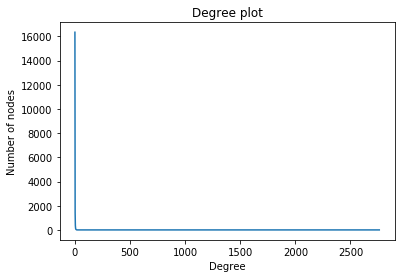

In [7]:
# Generamos un plot con la distribución de grados
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(data[0], data[1])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Degree plot')
plt.show()

El *plot* que acabamos de generar es poco informativo: podemos ver como la mayoría de los nodos tienen un grado muy bajo, pero es difícil apreciar cuál es exactamente este grado (¿0?, ¿1?, quizás ¿2?) y no sabemos cuántos nodos tienen grados más altos (¿cuántos nodos tienen un grado superior a 500? ¿Existe alguno?). Para poder obtener más información, cambiaremos la escala de los ejes, de lineal a logarítmica:

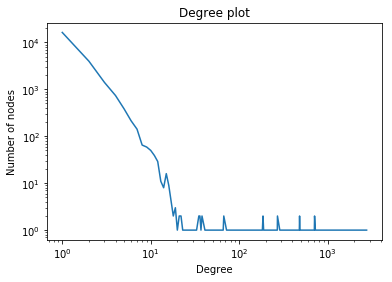

In [9]:
fig = plt.figure()
plt.plot(data[0], data[1])

# Especificamos escala logarítmica en ambos ejes
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Degree plot')
plt.show()

## 2. Distancias

Por último, veremos cómo obtener métricas básicas de distancia usando un grafo de menor tamaño, el grafo del [club de Karate de Zacarías](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). En la siguiente unidad, veremos otros conceptos más avanzados de análisis de grafos.

In [10]:
# Cargamos el grafo
g = nx.karate_club_graph()

# Mostramos el diámetro, el radio y la media de los caminos más cortos entre pares de nodos
print("El diámetro del grafo es: {}".format(nx.diameter(g)))
print("El radio del grafo es: {}".format(nx.radius(g)))
print("La media de los caminos más cortos del grafo es: {}".format(nx.average_shortest_path_length(g)))

El diámetro del grafo es: 5
El radio del grafo es: 3
La media de los caminos más cortos del grafo es: 2.408199643493761


Networkx también dispone de funciones para visualizar grafos. La función [`draw`](https://networkx.github.io/documentation/networkx-2.0/reference/generated/networkx.drawing.nx_pylab.draw.html#networkx.drawing.nx_pylab.draw) genera una visualización simple del grafo:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


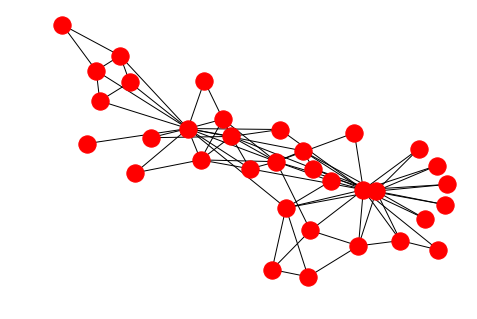

In [11]:
# Dibujamos los nodos y las aristas del grafo
nx.draw(g)

Vamos a generar una visualización del grafo anterior un poco más elaborada, que resalte uno de los caminos más cortos de longitud igual al radio del grafo y otro de longitud igual al diámetro. Notad que estos caminos no tienen porqué ser únicos, es decir, puede haber más de un camino de longitud igual al diámetro y más de un camino de longitud igual al radio (pero siempre habrá como mínimo un camino para cada valor). Además, ahora especificaremos explícitamente el algoritmo de *layout* que debe usarse para determinar las posiciones de los nodos en el plano.

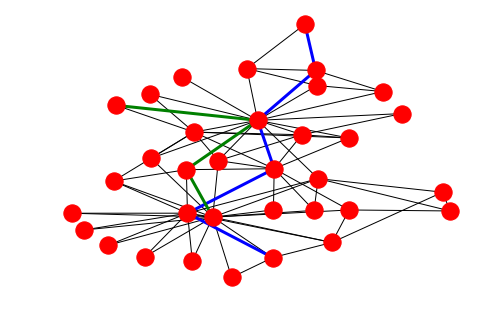

In [12]:
# Calculamos la posición de los nodos y las aristas del grafo usando el algoritmo kamada kawai
pos = nx.kamada_kawai_layout(g)
# Dibujamos todos los nodos y las aristas del grafo
nx.draw(g, pos)

# Calculamos el radio y el diámetro del grafo
diameter = nx.diameter(g)
radius = nx.radius(g)

# Buscamos algún camino más corto de longitud igual al radio y al diámetro
d_path, r_path = None, None
for sp in nx.all_pairs_shortest_path(g):
    origin = sp[0]
    for dest in sp[1]:
        if len(sp[1][dest]) == diameter + 1:
            d_path = sp[1][dest]
        if len(sp[1][dest]) == radius + 1:
            r_path = sp[1][dest]

# Creamos las listas de aristas en cada camino
edges_in_diam = [(d_path[i], d_path[i+1]) for i in range(len(d_path)-1)]   
edges_in_rad = [(r_path[i], r_path[i+1]) for i in range(len(r_path)-1)]   

# Repintamos las aristas de las listas de color azul (diámetro) y verde (radio)
nx.draw_networkx_edges(g,pos=pos, edgelist=edges_in_diam, edge_color='b', width=3)
nx.draw_networkx_edges(g,pos=pos, edgelist=edges_in_rad, edge_color='g', width=3)